# We Rate Dogs @WeRateDogs
## Udacity'  Project 4 : Data Wrangling


Key Points

Key points to keep in mind when data wrangling for this project:

    You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
    Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
    Cleaning includes merging individual pieces of data according to the rules of tidy data.
    The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
    You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.
    
##### Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

##### Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.
Reporting for this Project

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.


### Data Issues: - Summary: 

1. Data Issues: 
    - Correct invalid dog names and ratings. 
    - Clean breed information -> Select a valid breed from image_prediction. 
    - Remove duplicated pictures (basing on jpg_url column)
    - timestamp appears as "object" -> change to datetime to work with. 
    - Drop inconsequential data
    - Remove retweetes
    - Remove replies
    - Re-classify mixed dogs into a new dog profile
   
2. Tidiness Issues: 
    - It is feasable to gather all sources into a unique dataframe, linking all of them by tweet_id.
    - Dog Stages should be gathered in a unique column.

    

In [65]:
import pandas as pd
import json
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

# Gathering Data

In [66]:
#df_1 will be the data obtained from the tsv file - image recognition - via request library from UDACITY page
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictor.tsv", 'wb') as file_recog: 
    file_recog.write(response.content)

df_1 = pd.read_csv("image-predictor.tsv",  sep = '\t')
df_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [67]:
df_1_backup = df_1.copy()


In [68]:
#tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/

# Data Assessing

In [69]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### This dataframe (df_1) contains data related to tweets with pictures. Hence, it is not required to drop tweets.

In [70]:
breeds = []
for i in df_1.index:
    if df_1.loc[i, 'p1_dog'] == True:
        breeds.append(df_1.loc[i,'p1'])
    elif df_1.loc[i, 'p2_dog'] == True:
        breeds.append(df_1.loc[i, 'p2'])
    elif df_1.loc[i, 'p3_dog'] == True:
        breeds.append(df_1.loc[i, 'p3'])
    # In case of 3 falses in p1_dog, p2_dog & p3_dog
    else: breeds.append('not defined')

In [71]:
df_1['p4'] = breeds

In [72]:
df_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p4
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


#### Check for duplicated pics (based on duplicated jpg url's:

In [73]:
df_1['jpg_url'].value_counts()

https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg    2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg    2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg    2
                                                  ..
https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg    1
https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg    1
https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg    1
https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg    1
https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [74]:
df_1.drop_duplicates(subset = ['jpg_url'], inplace = True)
df_1.shape

(2009, 13)

#### Now , the information used will be stored in a new df (df_1_condensed)

In [75]:
df_1_cond = df_1[['tweet_id','jpg_url', 'p4']]
df_1_cond.head()

,tweet_id,jpg_url,p4
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [76]:
df_2 = pd.read_csv('twitter-archive-enhanced-2.csv')
df_2.head(1)
df_2_backup = df_2.copy()

In [77]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### From info method on this dataframe, "timestamp" column is classified as object (perhaps a text). To maximize this information, it will be modified to datetime class.

In [78]:
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])

In [79]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Firstly, it will be necessary to drop retweets and replies:

In [80]:
### to drop replies
df_2['in_reply_to_status_id'].fillna('nan', inplace = True)
df_2['retweeted_status_id'].fillna('nan', inplace = True)

for i in  df_2.index:
     if df_2.loc[i, 'in_reply_to_status_id'] != 'nan':
        df_2.drop(i, axis = 0, inplace = True)
        continue
#to drop retweets
     if df_2.loc[i, 'retweeted_status_id'] != 'nan':
        df_2.drop(i, axis = 0, inplace = True)
    
#Now, those columns will be dropped:
df_2.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], inplace = True)

In [81]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

# Cleaning Data

#### Since the denominator is the same for all ratings, it is not necessary to "drag" it. It will be dropped:

In [82]:
df_2.drop(columns = ['rating_denominator'],inplace = True)

In [83]:
df_2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


In [84]:
df_2['category'] = df_2['doggo'] + df_2['pupper'] + df_2['puppo'] + df_2['floofer']
#df_2['category'] = df_2[cats].apply(lambda x: sum(x), axis = 1)
df_2.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,category
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,NoneNoneNoneNone


In [85]:
#There is a evident tidiness issue (#1) in the classification dogs received (puppo, doggo, etc.)

df_2.loc[:,'category'].astype('str')
df_2.loc[:,'category'].replace('None', '', regex = True, inplace = True)
df_2.head(2)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,category
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,


In [86]:
df_2['category'].replace('', np.nan, inplace = True)
df_2['category'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

##### There is another conceptual problem: there are dogs with more than one "stage" or category. Firstly, if the number of dogs in this condition is low, they will be omitted. Otherwise, creating a new category is feasible.

In [87]:
df_2['category'].value_counts()

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggofloofer      1
doggopuppo        1
Name: category, dtype: int64

#### There are 326 tagged tweets.  Of them, 11 has more than 1 tag (2.7%) . For data conservation' sake, these will be modified to a new tag: "mixed"

In [88]:
df_2['category'].replace('doggopupper','mixed', inplace = True)
df_2['category'].replace('doggofloofer','mixed', inplace = True)
df_2['category'].replace('doggopuppo','mixed', inplace = True)
df_2['category'].value_counts()

pupper     221
doggo       72
puppo       23
mixed       11
floofer      9
Name: category, dtype: int64

#### Now, stage'  columns are not required:

In [89]:
cats =['doggo', 'floofer', 'pupper', 'puppo']
df_2.drop(columns = cats, inplace = True)

In [90]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2097 non-null   int64              
 1   timestamp         2097 non-null   datetime64[ns, UTC]
 2   source            2097 non-null   object             
 3   text              2097 non-null   object             
 4   expanded_urls     2094 non-null   object             
 5   rating_numerator  2097 non-null   int64              
 6   name              2097 non-null   object             
 7   category          336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 227.4+ KB


In [91]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2097 non-null   int64              
 1   timestamp         2097 non-null   datetime64[ns, UTC]
 2   source            2097 non-null   object             
 3   text              2097 non-null   object             
 4   expanded_urls     2094 non-null   object             
 5   rating_numerator  2097 non-null   int64              
 6   name              2097 non-null   object             
 7   category          336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 227.4+ KB


# df_3 comes from json file

In [92]:
consumer_key = 'Hidden'
consumer_secret = 'Secret'
access_token = 'Hidden, again'
access_secret = 'Secret, again'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [93]:
api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_3.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

AttributeError: 'DataFrame' object has no attribute 'tweet_id'

In [94]:
list_from_json = []

with open('tweet-json.txt') as file:
    for line in file:
        list_from_json.append(json.loads(line))

df_3 = pd.DataFrame(list_from_json)
df_3.head()
df_3_backup = df_3.copy()

In [95]:
df_3.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [96]:
lista = ['id','retweet_count', 'favorite_count']
df_3_depured = df_3[lista]
df_3_depured

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [97]:
df_2_and_3 = df_2.merge(df_3_depured,left_on = 'tweet_id', right_on = 'id')

#### Now,  df_1_cond is merged with df_2_and_3:

In [98]:
df_final = df_2_and_3.merge(df_1_cond, left_on = 'tweet_id', right_on = 'tweet_id')

In [99]:
df_final

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,category,id,retweet_count,favorite_count,jpg_url,p4
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not defined
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,NaN,666049248165822465,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,NaN,666044226329800704,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,NaN,666033412701032449,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,NaN,666029285002620928,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


In [100]:
df_final['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

### Assessing Name columns

In [101]:
df_final['name'].value_counts()

None       524
a           55
Charlie     11
Cooper      10
Oliver      10
          ... 
Ozzy         1
Aja          1
Willem       1
Julio        1
Binky        1
Name: name, Length: 935, dtype: int64

In [102]:
df_names = df_final.query('name != "None" and name !=  "a"')
df_names['name'].value_counts()

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
           ..
Akumi       1
Kial        1
Rambo       1
Richie      1
Newt        1
Name: name, Length: 933, dtype: int64

In [103]:
df_final.drop(columns = ['id'], inplace = True)

### Assessing dog ratings

#### There is an important number of ratings out of order (far over 15 or under 4) . But, assuming the page' premise: "They´re good dogs, Brent", ratings under 10 will not be considered. 

In [104]:
df_good_dogs = df_final.query('rating_numerator < 15 and rating_numerator >= 10')

In [105]:
df_good_dogs['rating_numerator'].value_counts()

12    446
10    417
11    392
13    253
14     33
Name: rating_numerator, dtype: int64

#### This ratings embrace 1541 (78%) of the total.

### Assessing dog Breeds

In [106]:
df_final.rename({'p4':'Breed'}, axis = 'columns', inplace  = True)

In [107]:
df_final

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,category,retweet_count,favorite_count,jpg_url,Breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,not defined
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,NaN,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,a,NaN,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,NaN,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,NaN,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


In [108]:
df_breed = df_final.query('Breed != "None"')
df_breed['Breed'].value_counts()

not defined             305
golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
                       ... 
standard_schnauzer        1
Japanese_spaniel          1
EntleBucher               1
silky_terrier             1
Bouvier_des_Flandres      1
Name: Breed, Length: 114, dtype: int64

# Dog-olitic Analysis 

###  In this section, most expected questions will be answered: 
    1. Most retweeted dogs
    2. Most favorited dogs
    3. Most popular stage
    4. Most popular breeds
    5. Most popular name
    6. Number of interactions in the page over time.
    7. Favorite vs. Retweet: Is there a correlation?

#### Most retweeted dogs

In [109]:
df_top_retweeted = df_final.sort_values(by = ['retweet_count'], ascending = False).head(3)
df_top_retweeted

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,category,retweet_count,favorite_count,jpg_url,Breed
769,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever
397,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,NaN,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua
804,739238157791694849,2016-06-04 23:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog


###### The most retweeted - related pictures will be captured to create a PDF report:

In [110]:
df_top_retweeted['text']

769    Here's a doggo realizing you can stand in a po...
397    This is Stephan. He just wants to help. 13/10 ...
804    Here's a doggo blowing bubbles. It's downright...
Name: text, dtype: object

In [111]:
df_top_retweeted.head(3).index


Int64Index([769, 397, 804], dtype='int64')

In [112]:
retweeted_1 = requests.get(df_top_retweeted.loc[769, 'jpg_url']).content
retweeted_2 = requests.get(df_top_retweeted.loc[397, 'jpg_url']).content
retweeted_3 = requests.get(df_top_retweeted.loc[804, 'jpg_url']).content


In [113]:
with open('retweeted_no1.jpg', 'wb') as file1:
    file1.write(retweeted_1)
with open('retweeted_no2.jpg', 'wb') as file2:
    file2.write(retweeted_2)
with open('retweeted_no3.jpg', 'wb') as file3:
    file3.write(retweeted_3)

#### Most "liked <3 " dogs

In [114]:
df_top_liked = df_final.sort_values(by = ['favorite_count'], ascending = False).head(3)
df_top_liked

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,category,retweet_count,favorite_count,jpg_url,Breed
306,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier
769,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever
58,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,Duddles,NaN,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer


In [115]:
df_top_liked.head(3).index

Int64Index([306, 769, 58], dtype='int64')

In [116]:
liked_1 = requests.get(df_top_liked.loc[306, 'jpg_url']).content
liked_2 = requests.get(df_top_liked.loc[769, 'jpg_url']).content
liked_3 = requests.get(df_top_liked.loc[58, 'jpg_url']).content

In [117]:
with open('liked_no1.jpg', 'wb') as file1:
    file1.write(liked_1)
with open('liked_no2.jpg', 'wb') as file2:
    file2.write(liked_2)
with open('liked_no3.jpg', 'wb') as file3:
    file3.write(liked_3)

### Most popular dog Stage

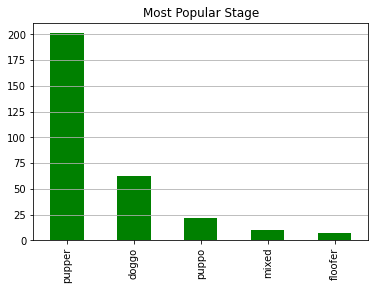

In [118]:
df_top_stage = df_final['category'].value_counts().sort_values(ascending = False)
g = df_top_stage.plot(kind = 'bar', grid = True, color = 'green')
plt.title("Most Popular Stage")
g.grid(axis = 'x')

### Most popular Breeds

In [119]:
df_top_breed = df_final['Breed'].value_counts().sort_values(ascending = False)

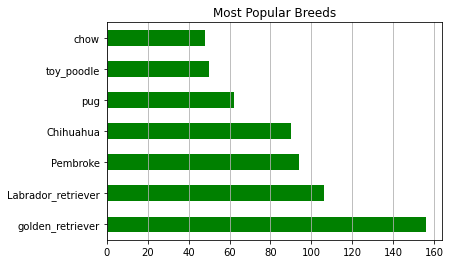

In [120]:
gr = df_top_breed.drop(index = 'not defined').head(7).plot(kind = 'barh', color = 'green', grid = True)
plt.title("Most Popular Breeds")
gr.grid(axis = 'y');

#### Most popular names

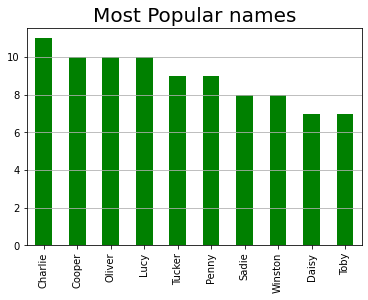

In [121]:
df_top_names = df_final['name'].value_counts().drop(index = ['a', 'None']).head(10)
df_top_names.plot(kind = 'bar', color = 'green')
plt.title('Most Popular names', size=  20)
plt.grid(axis = 'y');


### Interactions over time: publications - likes - retweets

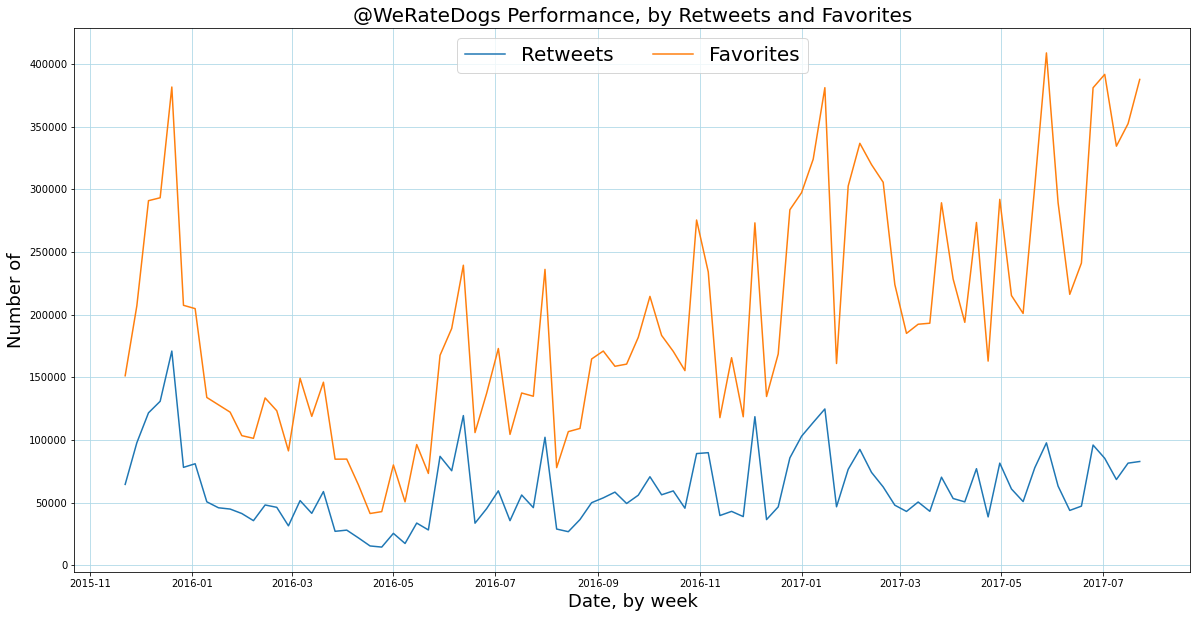

In [122]:
# https://stackoverflow.com/questions/42255458/how-to-group-a-pandas-dataframe-by-a-defined-time-interval
# it consideres all but the first and last week
retweets = df_final.groupby(pd.Grouper(key = 'timestamp', freq = '7d'))['retweet_count'].sum().reset_index().sort_values('timestamp')[1:-1]
favorites = df_final.groupby(pd.Grouper(key = 'timestamp', freq = '7d'))['favorite_count'].sum().reset_index().sort_values('timestamp')[1:-1]
labels = ['Retweets', 'Favorites', 'publications']
plt.subplots(figsize=(20, 10))
plt.plot(retweets.timestamp, retweets.retweet_count)
plt.plot(favorites.timestamp, favorites.favorite_count)
plt.grid(b=True, color='lightblue')
plt.xlabel('Date, by week', size=18)
plt.ylabel('Number of', size=18)
plt.title('@WeRateDogs Performance, by Retweets and Favorites', size=20)
plt.legend(labels, prop = {'size': 20}, loc = 'upper center', ncol = 2);


### Favorites vs. Retweets: Is there a correlation?

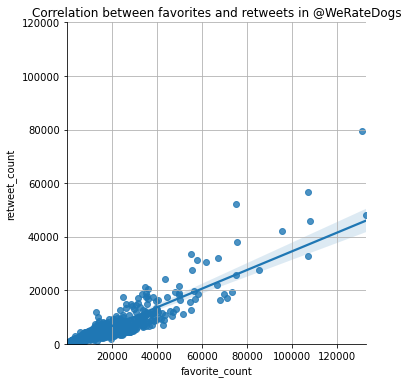

In [123]:
lista = ['favorite_count', 'retweet_count']
df_corr = df_final[lista]
graph =  sns.lmplot(x = 'favorite_count', y = 'retweet_count', data = df_corr, fit_reg = True)
graph.set(ylim = (0, 120000))
plt.title("Correlation between favorites and retweets in @WeRateDogs")
plt.grid()

plt.show();

##### The correlation index (Pearson r^2) between favorites and retweets is:

In [124]:
round(st.pearsonr(df_corr.favorite_count, df_corr.retweet_count)[0], 5)

0.91301

In [125]:
df_final.to_csv('twitter_archive_master.csv', index=False)